# CNS Week 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Exercise 1

## question a

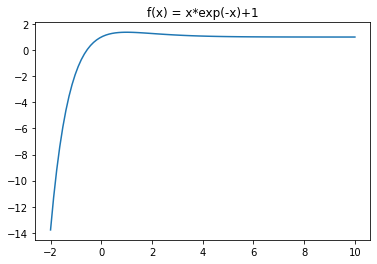

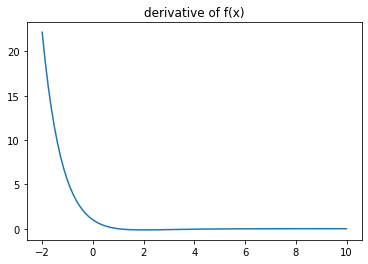

In [ ]:
x = np.linspace(-2,10,100)
f = lambda x : x * np.exp(-x) + 1
df = lambda x : np.exp(-x) + -x*np.exp(-x)

plt.plot(x,f(x))
plt.title('f(x) = x*exp(-x)+1')
plt.show()

plt.plot(x,df(x))
plt.title('derivative of f(x)')
plt.show()

In [ ]:
f = lambda x : x * np.exp(-x) + 1
df = lambda x : np.exp(-x) + -x*np.exp(-x)

for x0 in [0.5,0.7,1.3,1.5]:
  x = x0
    
  for i in range(30):
    fx = f(x)
    dfx = df(x)
    x = x - 0.1*fx/dfx

  print('f(x) = 0   ->   x = ',x)


f(x) = 0   ->   x =  -0.5498977345718884
f(x) = 0   ->   x =  -0.5546796784640214
f(x) = 0   ->   x =  nan
f(x) = 0   ->   x =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


we see that for x larger than x for df = 0, we get nan's, since Newton's method cannot go over the bump. This is due to the fact that Newton's method is a local function.

In [ ]:
root = fsolve(f,0.6)
f(root)
print(root,f(root))

[-0.56714329] [0.]


In [ ]:
f = lambda x : x * np.exp(-x) + 1
df = lambda x : np.exp(-x) + -x*np.exp(-x)

## question b

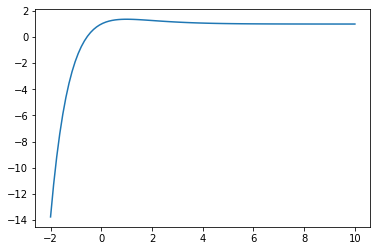

In [ ]:
x = np.linspace(-2,10,100)
f = lambda x,a : x * np.exp(-x) + a

plt.plot(x,f(x,1))

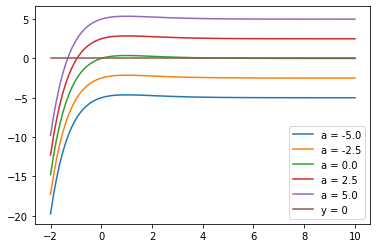

In [ ]:
x = np.linspace(-2,10,100)
f = lambda x,a : x * np.exp(-x) + a

avals = np.linspace(-5,5,5)
for a in avals:
  plt.plot(x,f(x,a),label = 'a = {}'.format(a))

plt.plot(x,np.zeros(len(x)),label = 'y = 0')
plt.legend()
plt.show()

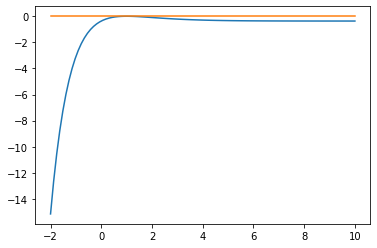

In [ ]:
x = np.linspace(-2,10,100)
f = lambda x,a : x * np.exp(-x) + a
a = -np.exp(-1)
plt.plot(x,f(x,a),label = 'a = {}'.format(a))
plt.plot(x,np.zeros(len(x)),label = 'y = 0')
plt.show()


if the trajectory does not intersect with y = 0, we will not get any solution for newton's method. solve for a with f(x(df=0)) = 0 to find the transition value of a:

$f(x,a) = x exp(-x) + a \\
df(x) = (1-x)exp(-x) = 0 → x = 1 \\
f(1,a) = 0 = exp(-1) + a → a = - \frac{1}{e} $ 

So for values under $- \frac{1}{e} $ there will be no intersections with y = 0, and thus no roots, and for values above $ - \frac{1}{e} $ there will be intersection with y = 0 and consequently roots can be found.

# Exercise 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

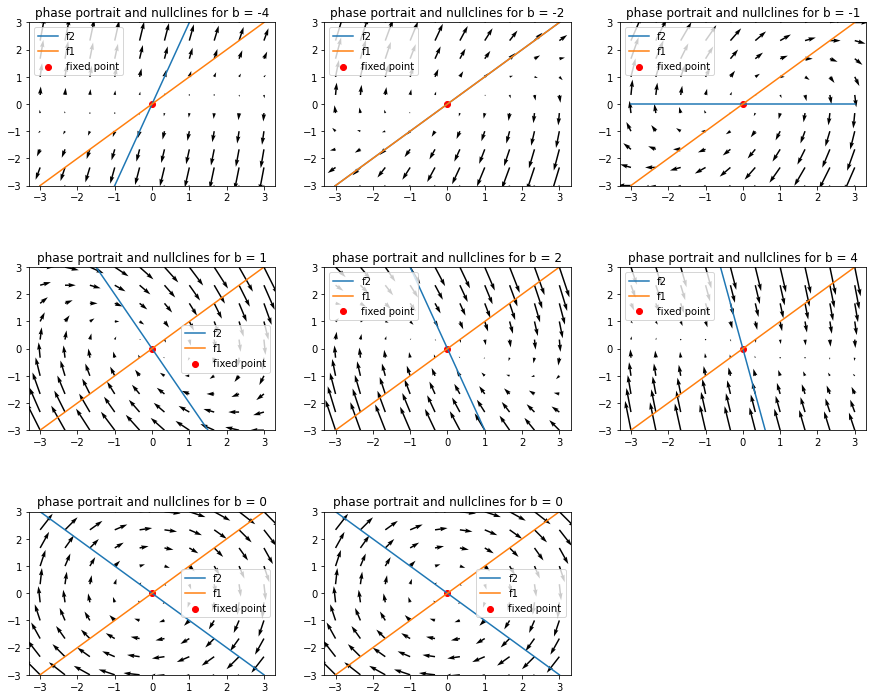

In [ ]:
f1 = lambda u1,u2 : u2
f2 = lambda u1,u2 : -b*u2 - u1

u1 = np.linspace(-3,3,100)
u2 = np.linspace(-3,3,100)
u1mesh,u2mesh = np.meshgrid(np.linspace(-3,3,10),np.linspace(-3,3,10))
bvalues = [-4,-2,-1,1,2,4,0,0]

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for n,b in enumerate(bvalues):
  ax = plt.subplot(3, 3, n + 1)

  f1mesh = f1(u1mesh,u2mesh)
  f2mesh = f2(u1mesh,u2mesh)
  ax.quiver(u1mesh,u2mesh,f1mesh,f2mesh)

  ax.plot(u1,f2(u1,u2),label='f2')
  ax.plot(u2,f1(u1,u2),label='f1')
  ax.scatter(0,0,c = 'r',label = 'fixed point')
  ax.set_title('phase portrait and nullclines for b = {}'.format(b))
  ax.set_ylim(-3,3)
  ax.legend()
  # ax.savefig('phase_portrait_b{}'.format(b))

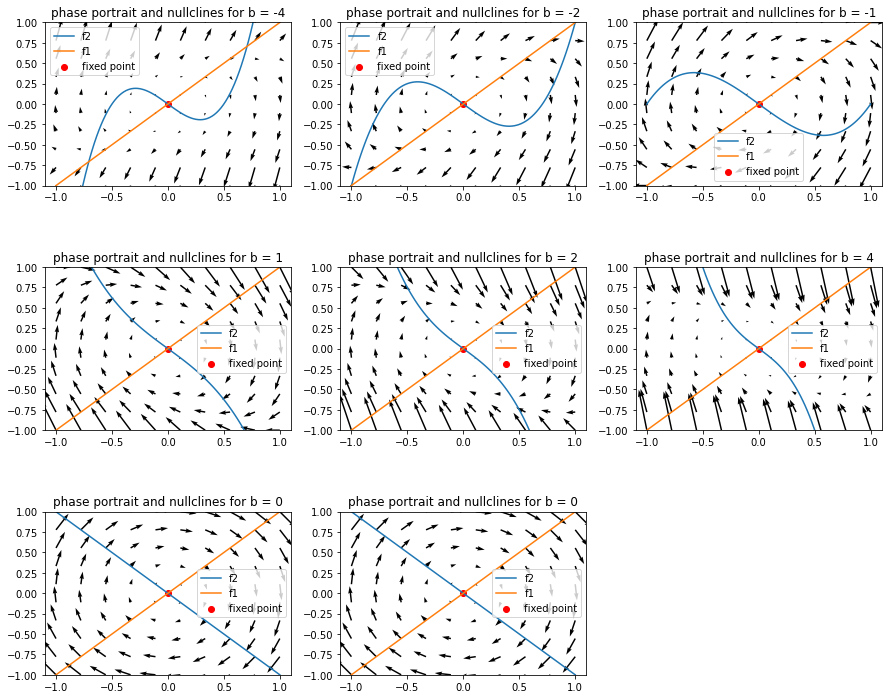

In [ ]:
f1 = lambda u1,u2 : u2
f2 = lambda u1,u2 : -b*u2**3 - u1

u1 = np.linspace(-1,1,100)
u2 = np.linspace(-1,1,100)
u1mesh,u2mesh = np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,1,10))
bvalues = [-4,-2,-1,1,2,4,0,0]

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for n,b in enumerate(bvalues):
  ax = plt.subplot(3, 3, n + 1)

  f1mesh = f1(u1mesh,u2mesh)
  f2mesh = f2(u1mesh,u2mesh)
  ax.quiver(u1mesh,u2mesh,f1mesh,f2mesh)

  ax.plot(u1,f2(u1,u2),label='f2')
  ax.plot(u2,f1(u1,u2),label='f1')
  ax.scatter(0,0,c = 'r',label = 'fixed point')
  ax.set_title('phase portrait and nullclines for b = {}'.format(b))
  ax.set_ylim(-1,1)
  ax.legend()
